[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Redes_Neuronales_Scratch/blob/main/Semana1/Regresion_de_cero.ipynb)



# Regresión Lineal desde Cero

En ésta clase programaremos una Regresión desde cero, paso a paso veremos como podríamos resolver éste problema cuando no podamos encontrar una solución analítica, modificando nuestros parámetros poco a poco para acercarnos a los parámetros que queremos encontrar.

# Dependencias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

La siguiente linea es para crear una semilla para la generación de nuestros números pseudo-aleatorios y poder repetir nuestros experimentos

In [ ]:
np.random.seed(20)

# Creación de nuestros datos sintéticos

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generar y = Xw + b + ruido"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

Aquí crearemos los parámetros reales, despues sin verlos trataremos de aproximarlos por medio de nuestros datos

In [ ]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
# Verdadedo label de los primeros datos
features[0][0]*true_w[0] + features[0][1]*true_w[1] + 1*true_b

5.301845150306699

In [ ]:
# Label asignado con un poco de ruido
labels[0]

array([5.31407416])

In [ ]:
# ¿Que representan éstas variables?
print('features:', features[0:6],'\nlabel:', labels[0:6])

features: [[ 0.88389311  0.19586502]
 [ 0.35753652 -2.34326191]
 [-1.08483259  0.55969629]
 [ 0.93946935 -0.97848104]
 [ 0.50309684  0.40641447]
 [ 0.32346101 -0.49341088]] 
label: [[ 5.31407416]
 [12.87720042]
 [ 0.10907668]
 [ 9.40698244]
 [ 3.82739534]
 [ 6.54716591]]


# Visualización de nuestros datos

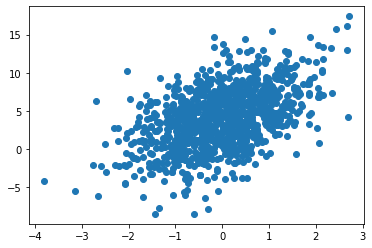

In [ ]:
plt.scatter(features[:, 0], labels)

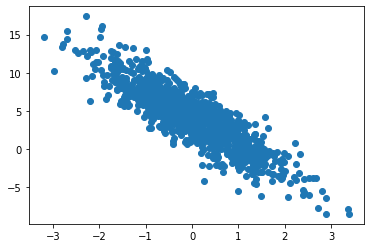

In [ ]:
plt.scatter(features[:, 1], labels)

In [ ]:
!pip install plotly

In [ ]:
# AUXILIAR: Solo para mostrar el gráfico 3D
import plotly.express as px
df = np.concatenate((features, labels),axis=1)
fig = px.scatter_3d(df, x=0, y=1, z=2)
fig.show()

# Recordatorio

Aproximaremos valores para la etiqueta $ \hat{y} $ que viene de

$$ \hat{y} = w_1  x_1 + w_2  x_2 + b, \,\,\,\,\,\,\,\,\,\, (\textbf{1}) $$


dados parámetros $ w_1, w_2, b $ que primero asignaremos al azar y luego iremos mejorando con el método de gradiente descendiente.

Otra forma de ver esa operación es:
$$ \hat{y} = \mathbf{w}^\top \mathbf{x} + b $$

Otra forma es modificando los datos, si tomamos la matriz aumentada $X = [x_1, x_2, 1 ]$ y los parámetros $ W = [ w_1, w_2 , b ]$ y con la operación

$$ \hat{y} = X\cdot W $$


# Funciones a utilizar en nuestro entrenamiento

La función de la regresión

In [ ]:
def h(x,theta):
    """Modelo de regresión lineal"""
    return np.matmul(x, theta)

Compararemos los valores verdaderos de las etiquetas (labels) con los valores aproximados, se hace con la función

$$ l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2  $$

La cual se promedia con la cantidad de elementos que usemos ($m$)

In [ ]:
def cost_function(x, y, theta):
  """Función de pérdida: Error cuadrático medio (promedio)"""
  return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [ ]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)

In [ ]:
print(w)
print(b)

[[ 0.00027021]
 [-0.00518603]]
[0.]


# Reacomodar nuestros datos para facilitar operaciones

In [ ]:
labels.shape # Variables Y

(1000, 1)

In [ ]:
np.ones(features.shape[0]).reshape(-1,1).shape

(1000, 1)

In [ ]:
features

array([[ 0.88389311,  0.19586502],
       [ 0.35753652, -2.34326191],
       [-1.08483259,  0.55969629],
       ...,
       [-0.0709407 , -1.63190951],
       [-0.3142736 , -0.20870062],
       [-0.08635826, -1.05431243]])

In [ ]:
X = np.concatenate((features, np.ones(features.shape[0]).reshape(-1,1)), axis=1)

In [ ]:
X

array([[ 0.88389311,  0.19586502,  1.        ],
       [ 0.35753652, -2.34326191,  1.        ],
       [-1.08483259,  0.55969629,  1.        ],
       ...,
       [-0.0709407 , -1.63190951,  1.        ],
       [-0.3142736 , -0.20870062,  1.        ],
       [-0.08635826, -1.05431243,  1.        ]])

In [ ]:
b.shape

(1,)

In [ ]:
theta = np.concatenate((w, b.reshape(-1,1)))

In [ ]:
theta

array([[ 0.00027021],
       [-0.00518603],
       [ 0.        ]])

# ¿Como se comparan las operaciones en nuestros datos nuevos?

In [ ]:
h(X, theta)[0]

array([-0.00077692])

In [ ]:
np.dot(features[0],w) + b

array([-0.00077692])

# Entrenemos nuestro modelo

El modo en que actualizaremos nuestros parametros (los que tratamos de estimar) es de la siguiente forma

$$ (\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b), $$

donde $\eta$ es el radio de aprendizaje (learning rate) y la cardinalidad de $ \mathcal{B} $ es la cantidad de elementos que utilizamos en la regresión (en nuestro caso 1000)

Más explicitamente

$$ \begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split} $$

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

In [ ]:
learning_rate = 0.03
num_epochs = 200

In [ ]:
theta, J_all = gradient_descent(X, labels, theta, learning_rate, num_epochs)
J = cost_function(X, labels, theta)
print("Cost: ", J)
print("Parameters: ", theta)

Cost:  [[0.00014846]]
Parameters:  [[ 1.99117691]
 [-3.3949448 ]
 [ 4.1893448 ]]


In [ ]:
print(J_all)

[array([[11.325896]]), array([[10.67248461]]), array([[10.05687871]]), array([[9.47688464]]), array([[8.93043638]]), array([[8.41558813]]), array([[7.93050726]]), array([[7.47346775]]), array([[7.04284392]]), array([[6.63710462]]), array([[6.25480772]]), array([[5.89459487]]), array([[5.55518668]]), array([[5.2353781]]), array([[4.93403404]]), array([[4.65008537]]), array([[4.38252504]]), array([[4.13040445]]), array([[3.89283007]]), array([[3.66896023]]), array([[3.45800212]]), array([[3.25920889]]), array([[3.07187704]]), array([[2.89534386]]), array([[2.72898507]]), array([[2.57221258]]), array([[2.42447241]]), array([[2.28524265]]), array([[2.15403167]]), array([[2.0303763]]), array([[1.91384021]]), array([[1.80401233]]), array([[1.70050539]]), array([[1.60295457]]), array([[1.51101614]]), array([[1.42436627]]), array([[1.34269988]]), array([[1.26572951]]), array([[1.19318436]]), array([[1.12480928]]), array([[1.06036387]]), array([[0.99962164]]), array([[0.94236917]]), array([[0.8

In [ ]:
perdida_por_epoca = np.array(J_all).reshape(-1,1)

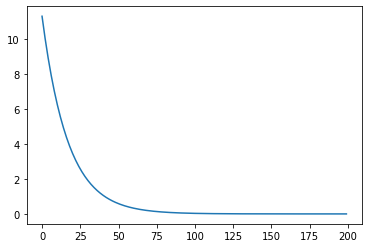

In [ ]:
plt.plot(perdida_por_epoca)

In [ ]:
# Recordemos nuestros datos verdaderos
print(f'Parámetros: {true_w}\nIntersecto (bias): {true_b}')

Parámetros: [ 2.  -3.4]
Intersecto (bias): 4.2


In [ ]:
print(f'error in estimating w: {true_w - theta[:2].reshape(-1,1)}')
print(f'error in estimating b: {true_b - theta[2]}')

error in estimating w: [[ 8.82309452e-03 -5.39117691e+00]
 [ 5.39494480e+00 -5.05519662e-03]]
error in estimating b: [0.0106552]


In [ ]:
theta[:2]

array([[ 1.99117691],
       [-3.3949448 ]])